In [1]:
"""
This code explains which of the independent variables are important to compute \
dependent variable. I have taken pima-indians-diabetes.csv which I had downloaded from \
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv?select=pima-indians-diabetes.csv

First step is to read the dataset and see how many input columns it has which is predictor values \ 
or feature values and output variable or response variable
"""
"""
For the model to give good result one needs to see the below points
-------------------------------------------------------------------
1.) Each independent variable must holds linear relationship with the dependent variable
2.) These independent variable should not hold linear relationship among themself else problem of multicolinearity 
    will develop
3.) Variance of error should be constant. For good results it must have zero mean and constant variance
4.) Observations must be reliable i.e each observation or row must be genuine or has real source

If a dataset follows these properties then one will get good results

"""

'\nFor the model to give good result one needs to see the below points\n-------------------------------------------------------------------\n1.) Each independent variable must holds linear relationship with the dependent variable\n2.) These independent variable should not hold linear relationship among themself else problem of multicolinearity \n    will develop\n3.) Variance of error should be constant. For good results it must have zero mean and constant variance\n4.) Observations must be reliable i.e each observation or row must be genuine or has real source\n\nIf a dataset follows these properties then one will get good results\n\n'

## Use pandas to read the csv file

In [2]:
"""
if one looks carefully at the dataset column names is not defined, names are taken \
from kaggle link \
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv?select=pima-indians-diabetes.csv%5Cn%5CnFirst
"""
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class_name']
diabetes_csv_file = pd.read_csv('pima-indians-diabetes.csv', names=columns)

In [4]:
diabetes_csv_file.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class_name
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
"""
Input features are: ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
Target column is ['class']
Aim is to find which of the input features are important for computing class
"""

"\nInput features are: ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']\nTarget column is ['class']\nAim is to find which of the input features are important for computing class\n"

In [6]:
"""
to extract values based on indexing use iloc
to extract values based on labels use loc
"""
data = diabetes_csv_file.iloc[:,0:(len(columns)-1)]

In [7]:
# checking correlation matric
data.corr()

,preg,plas,pres,skin,test,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


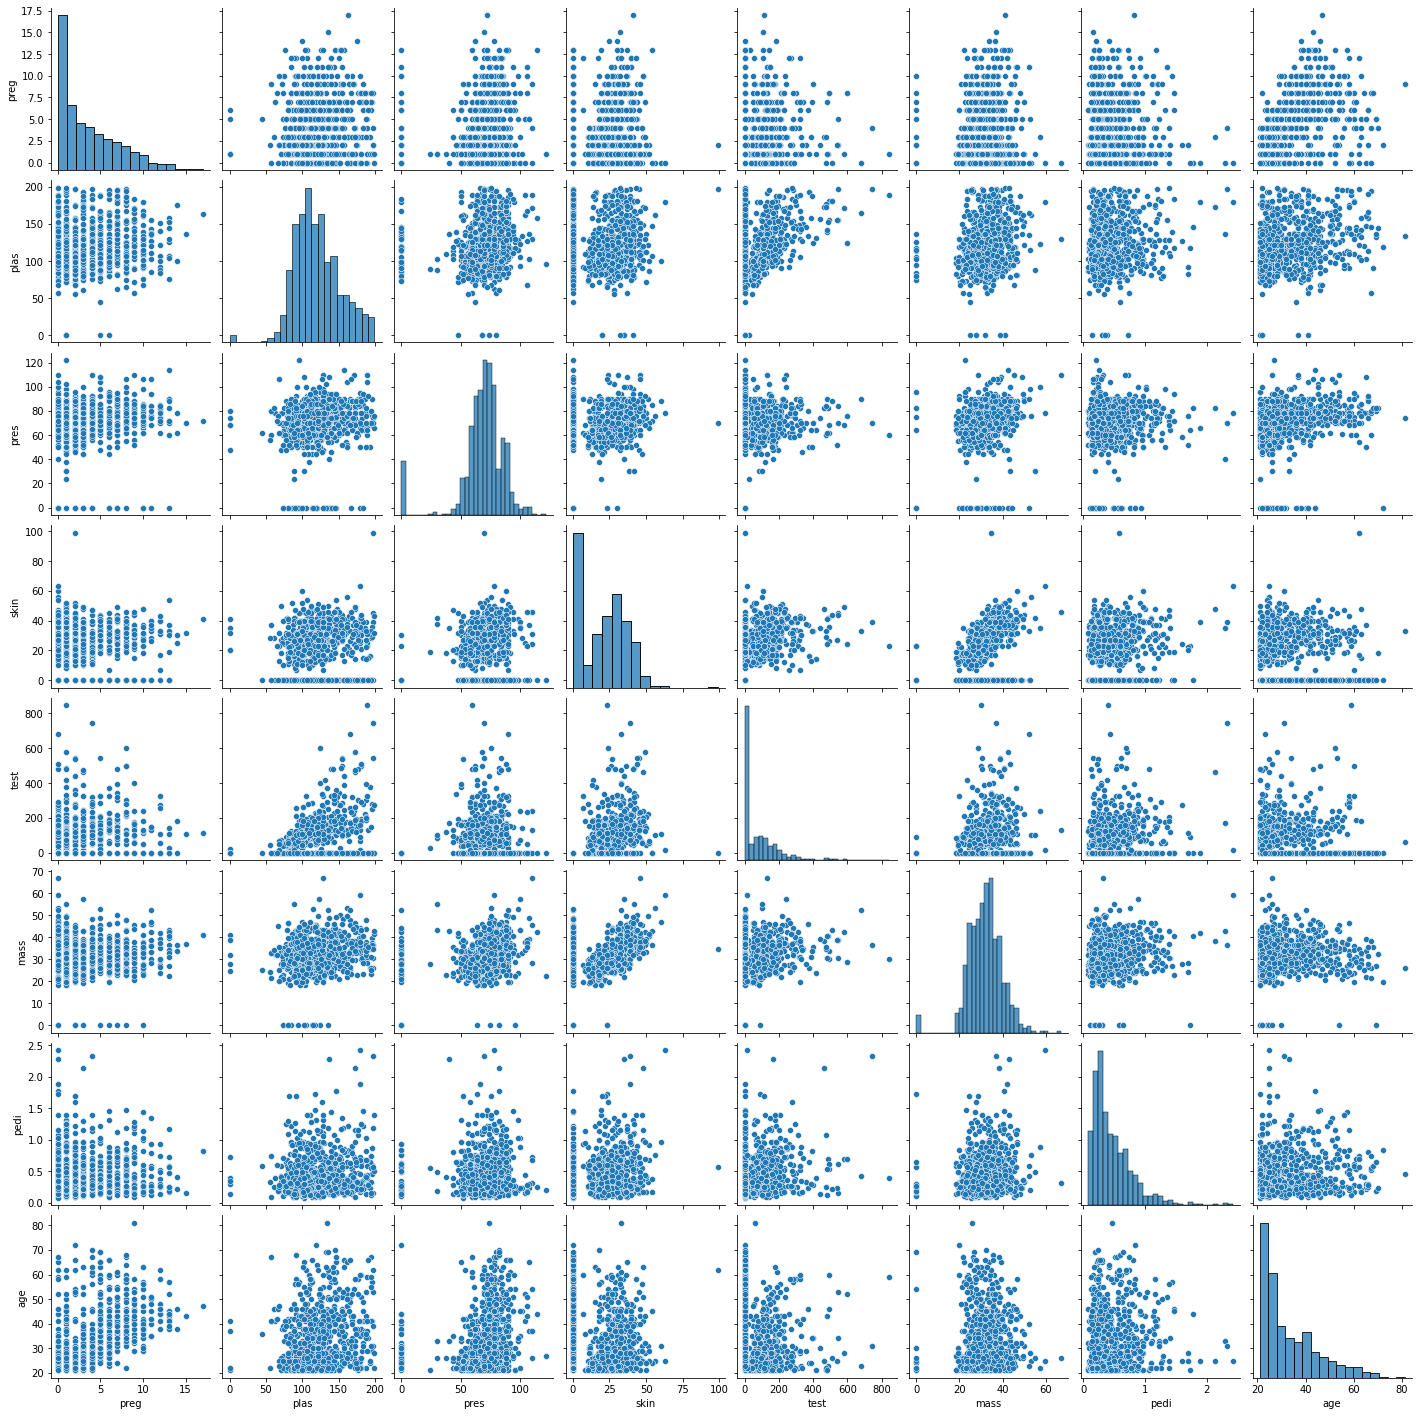

In [8]:
sns.pairplot(data)

In [9]:
target = diabetes_csv_file.iloc[:,len(columns)-1]

In [10]:
"""
To check which features are important for the model we will calculate
p value for each of the independent variable and if value<0.05,
we can say that such variable is significant to calculate the output
"""
ols_model = sm.OLS(target, data)

In [11]:
ols_fit = ols_model.fit()

In [12]:
ols_summary = ols_fit.summary()

In [13]:
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             class_name   R-squared (uncentered):                   0.487
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              90.10
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                   9.04e-105
Time:                        21:43:40   Log-Likelihood:                         -429.34
No. Observations:                 768   AIC:                                      874.7
Df Residuals:                     760   BIC:                                      911.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
preg           0.0247      0.005      4.536      0.000       0.014       0.035
plas           0.0039      0.001      7.701      0.000       0.003       0.005
pres          -0.0049      0.001     -6.005      0.000      -0.007      -0.003
skin        5.752e-05      0.001      0.049      0.961      -0.002       0.002
test        4.783e-05      0.000      0.304      0.761      -0.000       0.000
mass           0.0042      0.002      2.094      0.037       0.000       0.008
pedi           0.0980      0.048      2.059      0.040       0.005       0.191
age           -0.0010      0.002     -0.652      0.515      -0.004       0.002
==============================================================================
Omnibus:                      294.015   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.012
Skew:                           0.574   Prob(JB):                     4.22e-18
Kurtosis:                       1.913   Cond. No.                         575.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
"""
Some Observation while executing the above cell
Observation 1: R-squared > 0.8 for good fit but got only 0.487 and hence needs improvement
Observation 2: For any independent variable to be significiant, it must have p value < 0.05 and [skin, test, age] have value greater
               than 0.05 and hence are not significiant
"""

'\nSome Observation while executing the above cell\nObservation 1: R-squared > 0.8 for good fit but got only 0.487 and hence needs improvement\nObservation 2: For any independent variable to be significiant, it must have p value < 0.05 and [skin, test, age] have value greater\n               than 0.05 and hence are not significiant\n'

In [15]:
# modify data according to above model summary
modified_data = data.drop(['skin', 'test', 'age'], axis=1)

In [16]:
# again create OLS Model and get the summary. We need to see whether R**2 is improved or not
ols_modified_model = sm.OLS(target, modified_data)
ols_modified_fit = ols_modified_model.fit()
ols_modified_summary = ols_modified_fit.summary()

In [17]:
ols_modified_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             class_name   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.483
Method:                 Least Squares   F-statistic:                              144.5
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                   8.16e-108
Time:                        21:43:40   Log-Likelihood:                         -429.66
No. Observations:                 768   AIC:                                      869.3
Df Residuals:                     763   BIC:                                      892.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
preg           0.0225      0.005      4.875      0.000       0.013       0.032
plas           0.0038      0.000      8.507      0.000       0.003       0.005
pres          -0.0051      0.001     -6.579      0.000      -0.007      -0.004
mass           0.0042      0.002      2.250      0.025       0.001       0.008
pedi           0.0983      0.047      2.097      0.036       0.006       0.190
==============================================================================
Omnibus:                      328.615   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.837
Skew:                           0.569   Prob(JB):                     2.80e-18
Kurtosis:                       1.891   Cond. No.                         447.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking which observation are not important using influence plot 

In [18]:
"""
For this one needs to plot influence from sm.graphics \
step 1: create diabetes model using target column and input features you \
        got after p-value
step 2: Draw influence_plot
In the plot one need to calculate the H Leverage value according to the formula 3*(k+1)/n
where k is the number of features or regressors
      n is number of observations
H_leverage = 3*(5+1)/768
           = 0.0234 
Hence values or observation which has H leverage greater than 0.0234 needs to be discarded           
"""

diabetics_model = smf.ols('class_name ~ preg + plas + pres + mass + pedi', 
                      data=diabetes_csv_file).fit()
influence = diabetics_model.get_influence()
# sm.graphics.influence_plot(diabetics_model)

In [19]:
influence = influence.summary_frame()

In [20]:
# getting all those rows where H Leverage > 0.0234
data_frame_H_Leverage = influence[influence['hat_diag'] > 0.0234] 


In [21]:
data_frame_H_Leverage

,dfb_Intercept,dfb_preg,dfb_plas,dfb_pres,dfb_mass,dfb_pedi,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
4,-0.011162,-0.012304,-0.002118,-0.033708,0.021135,0.096057,0.001977,0.491393,0.046830,0.108920,0.491148,0.108865
7,-0.084562,-0.133211,0.004472,0.234102,-0.093690,0.055676,0.012181,-1.549348,0.029546,-0.270340,-1.550775,-0.270589
9,0.142013,0.080266,0.068271,0.230769,-0.440403,-0.019718,0.039003,2.590639,0.033694,0.483755,2.600415,0.485581
45,-0.009515,-0.006497,0.007914,-0.003022,0.003141,0.023196,0.000133,0.161018,0.029780,0.028210,0.160915,0.028192
49,-0.016690,-0.005757,-0.002137,0.011951,0.013885,-0.000289,0.000083,-0.119202,0.033930,-0.022339,-0.119125,-0.022325
58,0.081180,0.068199,-0.014644,-0.030885,-0.020748,-0.230683,0.011543,-1.685161,0.023809,-0.263173,-1.687202,-0.263491
60,0.081279,-0.002160,-0.000255,-0.047477,-0.059589,0.001261,0.001462,0.522461,0.031134,0.093657,0.522212,0.093613
78,0.038112,-0.027195,0.022977,-0.161574,0.098466,-0.035719,0.005731,1.091654,0.028047,0.185440,1.091792,0.185464
81,0.121845,-0.002854,-0.007334,-0.067098,-0.081608,-0.014131,0.003024,0.745431,0.031619,0.134697,0.745214,0.134658
125,0.007146,-0.016141,-0.067749,-0.136857,0.190453,-0.009697,0.008481,1.361399,0.026721,0.225575,1.362163,0.225702


In [22]:
# getting all the index values which are the rows or observation 
rows_h_leverage = list(data_frame_H_Leverage.index.values) 

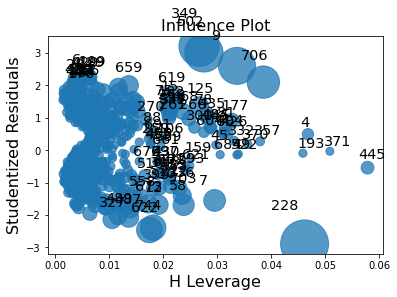

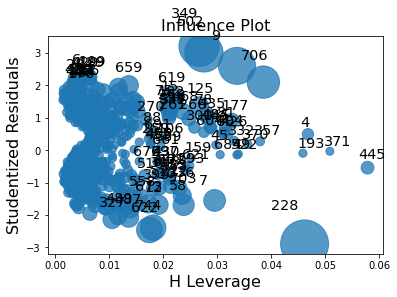

In [23]:
sm.graphics.influence_plot(diabetics_model)

In [24]:
"""
Some observation from the influence plot
Observation 1: Observation mentioned in rows_h_leverage are going out of the plot and hence we can \
discard them
"""
modified_data_influence = modified_data.drop(modified_data.index[rows_h_leverage], axis=0)
target_modified = target.drop(target.index[rows_h_leverage], axis=0)

In [25]:
# again create OLS Model and get the summary. We need to see whether R**2 is improved or not
ols_modified_model_influene = sm.OLS(target_modified, modified_data_influence)
ols_modified_fit_influence = ols_modified_model_influene.fit()
ols_modified_influence_summary = ols_modified_fit_influence.summary()

In [26]:
ols_modified_influence_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             class_name   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.475
Method:                 Least Squares   F-statistic:                              133.3
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                   3.55e-100
Time:                        21:43:42   Log-Likelihood:                         -402.96
No. Observations:                 732   AIC:                                      815.9
Df Residuals:                     727   BIC:                                      838.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
preg           0.0232      0.005      4.811      0.000       0.014       0.033
plas           0.0045      0.000      9.258      0.000       0.004       0.005
pres          -0.0053      0.001     -5.572      0.000      -0.007      -0.003
mass           0.0014      0.002      0.625      0.532      -0.003       0.006
pedi           0.1274      0.054      2.355      0.019       0.021       0.234
==============================================================================
Omnibus:                      261.964   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.025
Skew:                           0.571   Prob(JB):                     5.11e-17
Kurtosis:                       1.926   Cond. No.                         510.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""